169009152/169001437 [==============================] - 4s 0us/step
Epoch 1/100
1563/1563 [==============================] - 37s 24ms/step - loss: 4.5693 - accuracy: 0.0351 - precision: 0.0850 - recall: 0.0026 - val_loss: 4.4372 - val_accuracy: 0.0583 - val_precision: 0.1949 - val_recall: 0.0054
Epoch 2/100
1563/1563 [==============================] - 37s 23ms/step - loss: 4.1363 - accuracy: 0.0631 - precision: 0.1311 - recall: 0.0034 - val_loss: 4.2441 - val_accuracy: 0.0787 - val_precision: 0.2637 - val_recall: 0.0207
Epoch 3/100
1563/1563 [==============================] - 37s 23ms/step - loss: 3.7199 - accuracy: 0.1113 - precision: 0.3012 - recall: 0.0081 - val_loss: 3.5381 - val_accuracy: 0.1397 - val_precision: 0.4014 - val_recall: 0.0281
Epoch 4/100
1563/1563 [==============================] - 36s 23ms/step - loss: 3.3005 - accuracy: 0.1755 - precision: 0.4926 - recall: 0.0287 - val_loss: 2.9205 - val_accuracy: 0.2410 - val_precision: 0.5817 - val_recall: 0.0787
Epoch 5/100
1563/

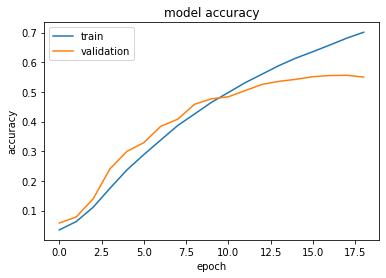

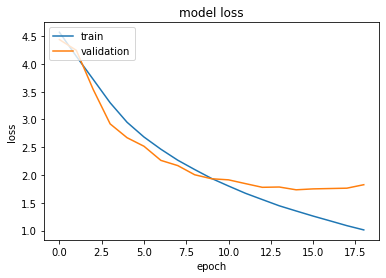

In [1]:
import tensorflow as tf
from keras.datasets import cifar100
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, BatchNormalization,Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.metrics import Precision,Recall
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers

(x_train,y_train),(x_test,y_test)=cifar100.load_data()


es= EarlyStopping(monitor='val_loss', patience=4)
mc= ModelCheckpoint(filepath='VGG16_ADAM_Dropout.h5', monitor='val_loss', save_best_only=True)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

mean = x_train.mean()
std= x_train.std()
x_train=(x_train-mean)/std

mean = x_test.mean()
std= x_test.std()
x_test=(x_test-mean)/std

model = Sequential()
x_shape=[32,32,3]

model = Sequential()
weight_decay = 0.0005
x_shape=[32,32,3]

model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.4))
model.add(Dense(100))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])
history=model.fit(x=x_train,y=y_train,epochs=100, validation_data=(x_test,y_test), callbacks=[es,mc])

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4]:
import keras 

(x_train,y_train),(x_test,y_test)=cifar100.load_data()
y_test=to_categorical(y_test)

mean = x_test.mean()
std= x_test.std()
x_test=(x_test-mean)/std


best_model= keras.models.load_model('VGG16_ADAM_Dropout.h5')
_, acc,precision,recall = best_model.evaluate(x_test, y_test)

print("Accuracy: "+str(acc*100)+"%")
print("Precision: "+str(precision*100)+"%")
print("Recall: "+str(recall*100)+"%")

313/313 [==============================] - 3s 8ms/step - loss: 1.7346 - accuracy: 0.5424 - precision: 0.7294 - recall: 0.4479
Accuracy: 54.24000024795532%
Precision: 72.9360044002533%
Recall: 44.78999972343445%
